In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from keras.datasets import cifar10
from keras.utils import to_categorical
from sklearn.manifold import TSNE

## Load cifar-10 dataset

In [8]:
# let's use just 1k of images
(x_train, y_train), (x_test, y) = cifar10.load_data()
X = x_test / 255.
X = X[:1000]
y = np.reshape(y, (y.shape[0]))
y = y[:1000]

#aux to plot images
X_ = X

In [9]:
print('x_test shape : {} | y_test shape : {}'.format(X.shape, y.shape))

x_test shape : (1000, 32, 32, 3) | y_test shape : (1000,)


In [10]:
# flatten images
X = np.reshape(X, (X.shape[0], 32 * 32 * 3))
X.shape

(1000, 3072)

In [11]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## PCA initialization (3 components)

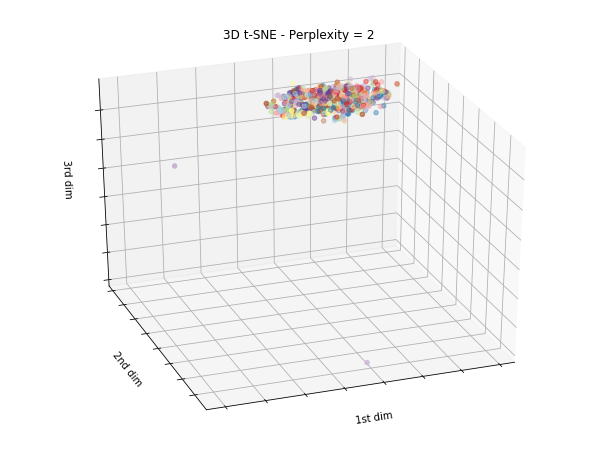

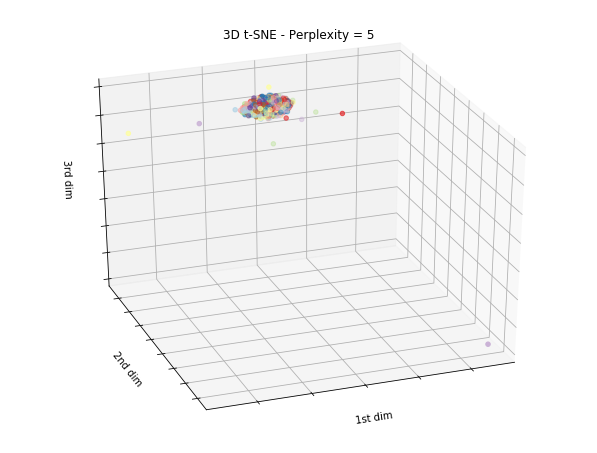

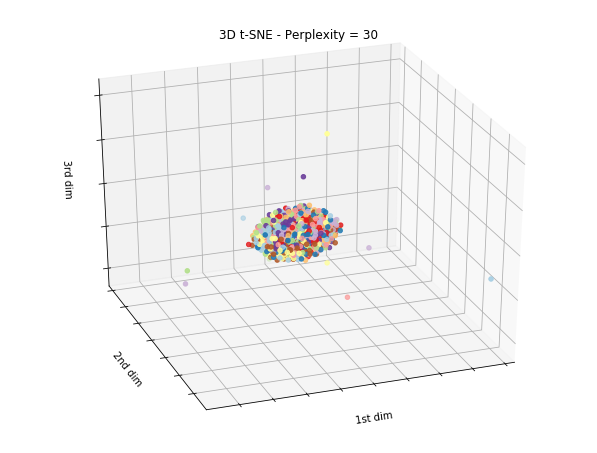

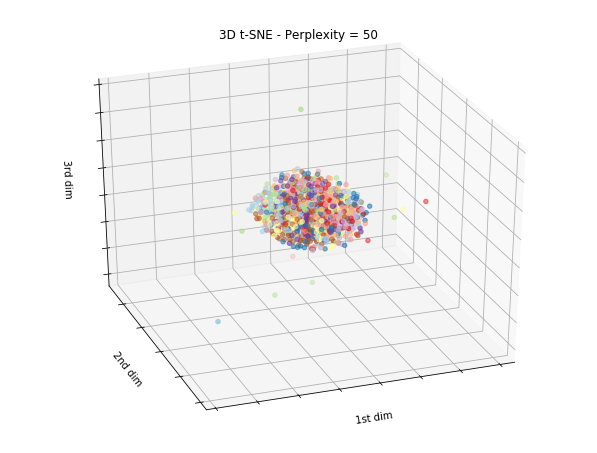

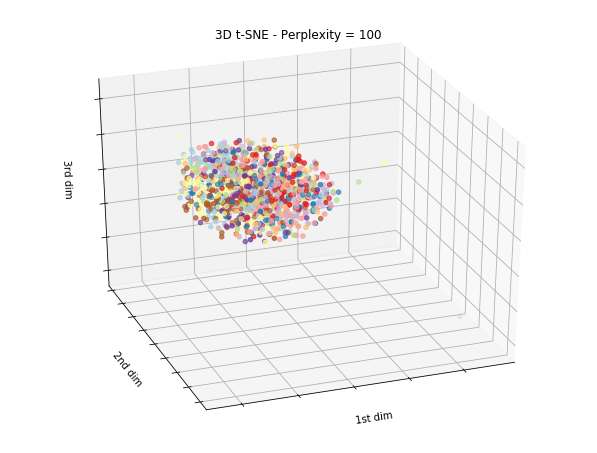

In [12]:
for i in [2, 5, 30, 50, 100]:
    fig = plt.figure(1, figsize=(8, 6))
    ax = Axes3D(fig, elev=-150, azim=110)
    
    model = TSNE(n_components=3, init='pca', perplexity=i)
    Y = model.fit_transform(X)

    ax.scatter(Y[:, 0], Y[:, 1], Y[:, 2],c=y, cmap=plt.cm.Paired)
    ax.set_title("3D t-SNE - Perplexity = {}".format(i))
    ax.set_xlabel("1st dim")
    ax.w_xaxis.set_ticklabels([])
    ax.set_ylabel("2nd dim")
    ax.w_yaxis.set_ticklabels([])
    ax.set_zlabel("3rd dim")
    ax.w_zaxis.set_ticklabels([])
    plt.show()

## 12-NN (t-SNE components)

In [13]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=12).fit(Y)
distances, indices = neighbors.kneighbors(Y)

In [14]:
sample = 7

In [15]:
distances[sample]

array([ 0.        , 17.66018795, 18.63521624, 19.2836594 , 19.52597486,
       20.54539699, 20.60138436, 20.94830115, 22.01398336, 24.48935508,
       25.69693048, 27.81626209])

In [16]:
nns = [y[i] for i in indices[sample]]
nns

[6, 5, 6, 6, 4, 3, 3, 4, 5, 3, 6, 0]

In [17]:
np.unique(nns)

array([0, 3, 4, 5, 6])

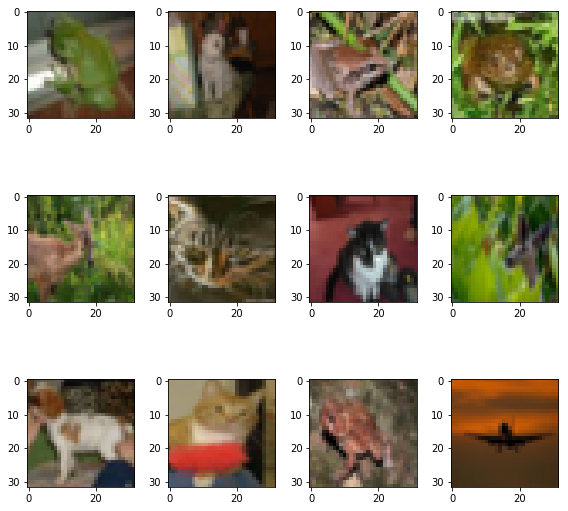

In [18]:
w = 32
h = 32
fig = plt.figure(figsize=(8, 8))
columns = 4
rows = 3
idx = 0
for i in range(1, columns * rows + 1):
#     img = np.random.randint(10, size=(h,w))
    img = X_[indices[sample][idx]]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    idx = idx + 1

plt.tight_layout()
plt.show()